# Loan Data Analysis & Prediction

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("tab10")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("loan_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25257 entries, 0 to 25256
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   25257 non-null  object 
 1   Current Loan Amount           25257 non-null  int64  
 2   Term                          25257 non-null  object 
 3   Credit Score                  25257 non-null  float64
 4   Annual Income                 25257 non-null  int64  
 5   Years in current job          25257 non-null  object 
 6   Home Ownership                25257 non-null  object 
 7   Purpose                       25257 non-null  object 
 8   Monthly Debt                  25257 non-null  float64
 9   Years of Credit History       25257 non-null  float64
 10  Months since last delinquent  25257 non-null  int64  
 11  Number of Open Accounts       25257 non-null  int64  
 12  Number of Credit Problems     25257 non-null  int64  
 13  C

In [4]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,25257.000000,25257.000000,2.525700e+04,25257.000000,25257.000000,25257.000000,25257.000000,25257.000000,2.525700e+04,2.525700e+04,25257.000000,25257.000000
mean,283630.014570,888.397403,1.139753e+06,16663.211394,18.514238,35.449182,7.568001,0.190640,1.974247e+05,5.857706e+05,0.124678,0.032545
std,163114.637162,891.437247,3.714070e+05,8851.486001,6.469755,21.927497,4.185578,0.520983,1.944974e+05,6.500274e+06,0.371327,0.273937
min,21450.000000,351.000000,1.112450e+05,0.000000,3.800000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,158356.000000,675.000000,8.524730e+05,10338.660000,14.100000,17.000000,5.000000,0.000000,8.080320e+04,2.311100e+05,0.000000,0.000000
50%,258148.000000,714.000000,1.128372e+06,15582.660000,17.200000,32.000000,7.000000,0.000000,1.490892e+05,3.832400e+05,0.000000,0.000000
75%,383240.000000,734.000000,1.421732e+06,21851.710000,21.700000,52.000000,9.000000,0.000000,2.559680e+05,6.209060e+05,0.000000,0.000000
max,789096.000000,4506.000000,1.892913e+06,61734.990000,70.500000,176.000000,41.000000,15.000000,6.317956e+06,7.982554e+08,6.000000,15.000000


In [5]:
df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
Loan ID                         0
Customer ID                     0
dtype: int64

In [6]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Loan ID',
       'Customer ID'],
      dtype='object')

## High level view of Data Insigts

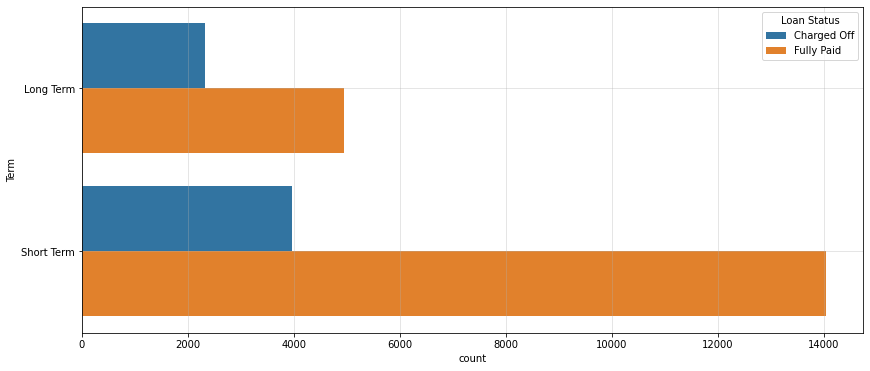

In [7]:
plt.figure(figsize=(14,6))
sns.countplot(y ='Term', data = df,hue='Loan Status') 
plt.grid(alpha=0.4)

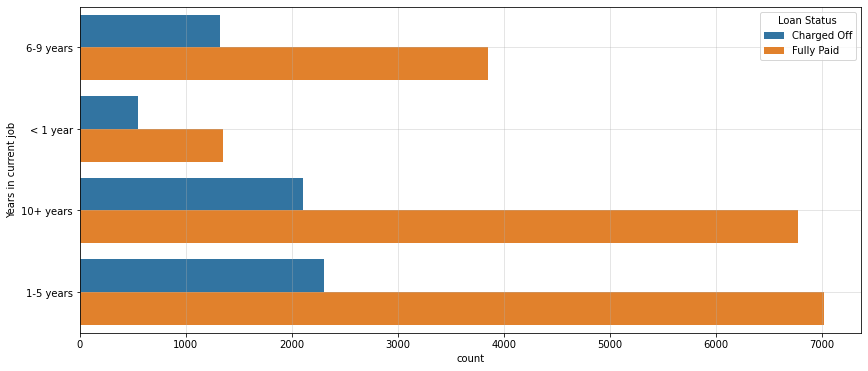

In [8]:
plt.figure(figsize=(14,6))
sns.countplot(y ='Years in current job', data = df,hue='Loan Status') 
plt.grid(alpha=0.4)

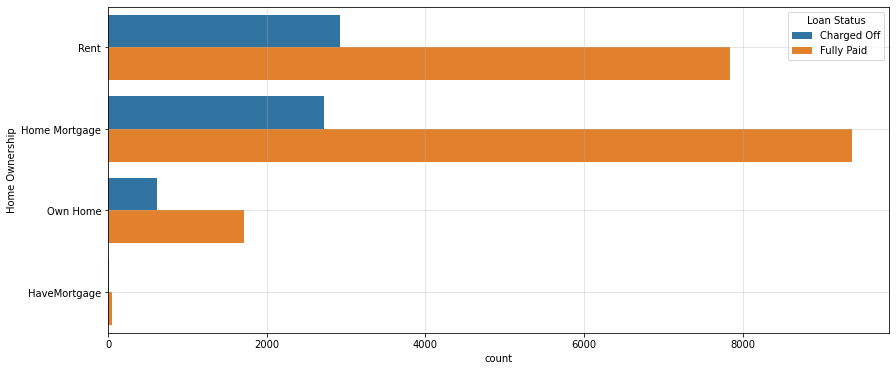

In [9]:
plt.figure(figsize=(14,6))
sns.countplot(y ='Home Ownership', data = df,hue='Loan Status') 
plt.grid(alpha=0.4)

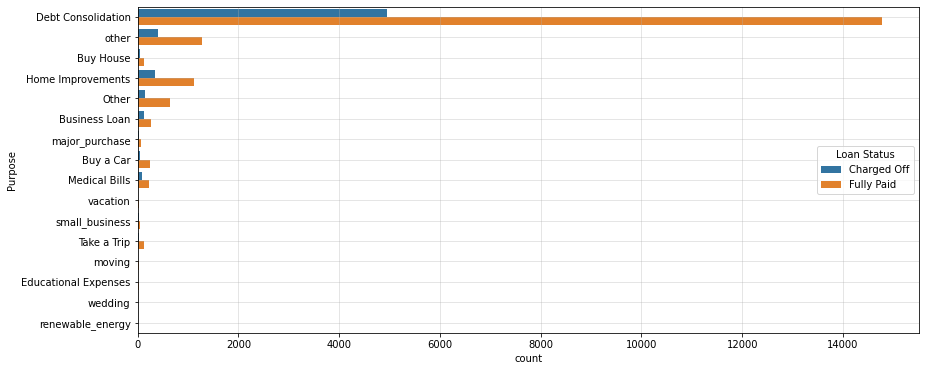

In [10]:
plt.figure(figsize=(14,6))
sns.countplot(y ='Purpose', data = df,hue='Loan Status') 
plt.grid(alpha=0.4)

In [11]:
df.drop(['Loan ID','Customer ID'], axis=1, inplace=True)

In [12]:
low = .05
high = .80
temp = df['Annual Income'].quantile([low, high])
print(temp)

0.05     563084.0
0.80    1496398.2
Name: Annual Income, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f6a91074290>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6a91074d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6a9105f450>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6a91079810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6a91079d50>],
 'means': []}

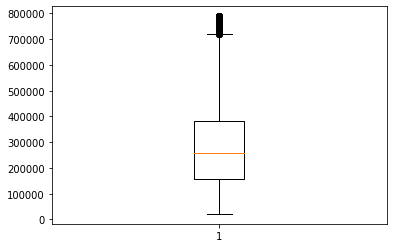

In [13]:
plt.boxplot(df['Current Loan Amount'])

In [14]:
df = df[df['Current Loan Amount'] !=  99999999]

## Loan Amount Distribution

(array([2521., 4711., 5171., 4188., 3250., 2343., 1407.,  650.,  541.,
         475.]),
 array([ 21450. ,  98214.6, 174979.2, 251743.8, 328508.4, 405273. ,
        482037.6, 558802.2, 635566.8, 712331.4, 789096. ]),
 <a list of 10 Patch objects>)

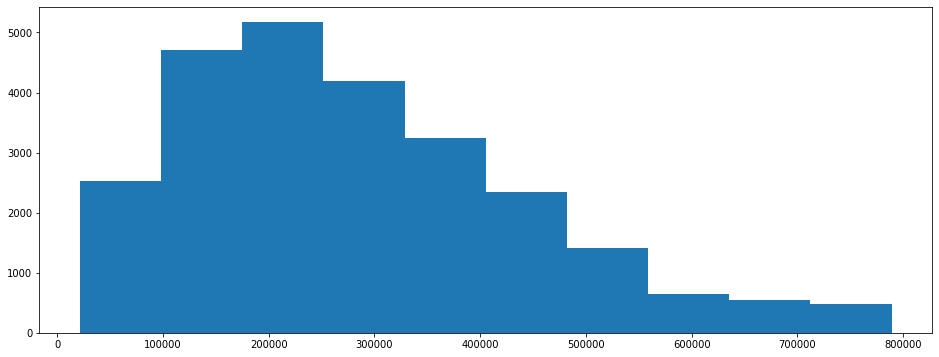

In [15]:
plt.figure(figsize=(16,6))
plt.hist(df['Current Loan Amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6aa0937750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6aa093e210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6aa077d950>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6aa093ecd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6aa0945250>],
 'means': []}

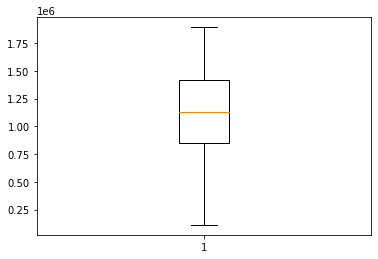

In [16]:
plt.boxplot(df['Annual Income'])

In [17]:
df = df[df['Annual Income'] <=  1892947.2]

## Annual Income Distribution 

(array([  72.,  484., 1702., 3434., 4138., 4246., 3730., 3172., 2311.,
        1968.]),
 array([ 111245. ,  289411.8,  467578.6,  645745.4,  823912.2, 1002079. ,
        1180245.8, 1358412.6, 1536579.4, 1714746.2, 1892913. ]),
 <a list of 10 Patch objects>)

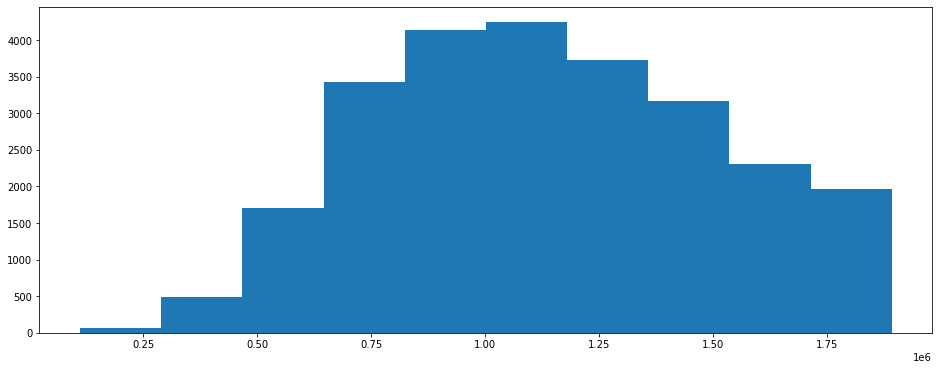

In [18]:
plt.figure(figsize=(16,6))
plt.hist(df['Annual Income'])

## Understanding data before getting into ML Part

### Let's split the data into "Fully Paid" & "Charged Off" categories of outcome 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25257 entries, 0 to 25256
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   25257 non-null  object 
 1   Current Loan Amount           25257 non-null  int64  
 2   Term                          25257 non-null  object 
 3   Credit Score                  25257 non-null  float64
 4   Annual Income                 25257 non-null  int64  
 5   Years in current job          25257 non-null  object 
 6   Home Ownership                25257 non-null  object 
 7   Purpose                       25257 non-null  object 
 8   Monthly Debt                  25257 non-null  float64
 9   Years of Credit History       25257 non-null  float64
 10  Months since last delinquent  25257 non-null  int64  
 11  Number of Open Accounts       25257 non-null  int64  
 12  Number of Credit Problems     25257 non-null  int64  
 13  C

In [20]:
df['Loan Status'].unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [21]:
loan_sanction = df[df['Loan Status'] == 'Fully Paid']
loan_rejected = df[df['Loan Status'] == 'Charged Off']

In [22]:
len(loan_sanction)

18980

In [23]:
len(loan_rejected)

6277

In [24]:
print("Total % Loan Charged Off = ",round((len(loan_rejected)/len(df))*100),"%")

Total % Loan Charged Off =  25 %


## Let's understand the factors that differentiates between those 2 labels 

### TERM Period

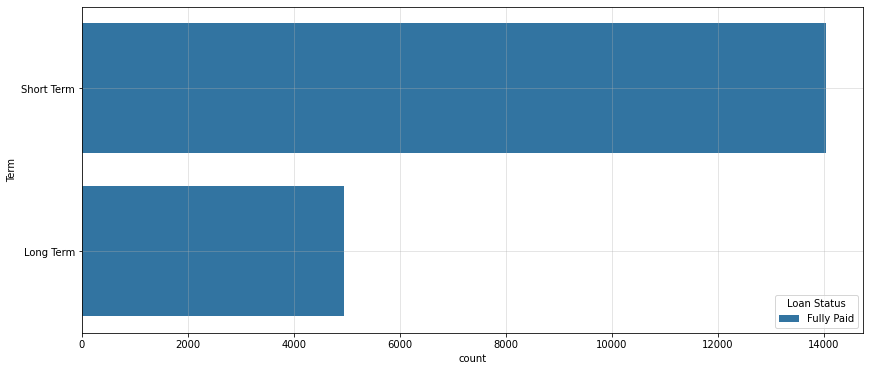

In [25]:
plt.figure(figsize=(14,6))
sns.countplot(y ='Term', data = loan_sanction,hue='Loan Status') 
plt.grid(alpha=0.4)

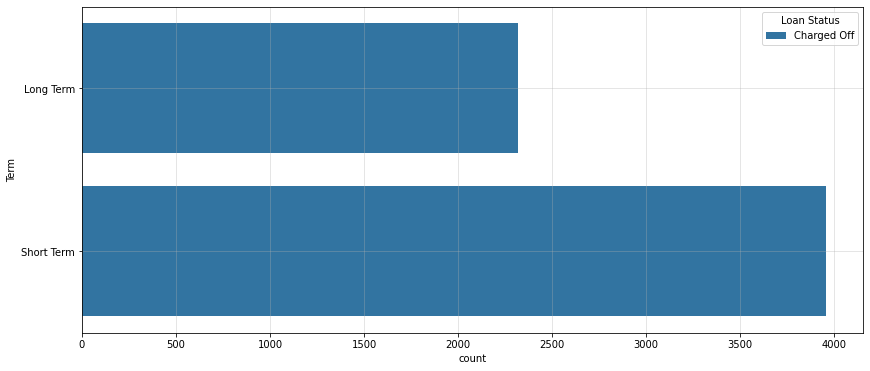

In [26]:
plt.figure(figsize=(14,6))
sns.countplot(y ='Term', data = loan_rejected,hue='Loan Status')
plt.grid(alpha=0.4)

### Current Loan Amount 

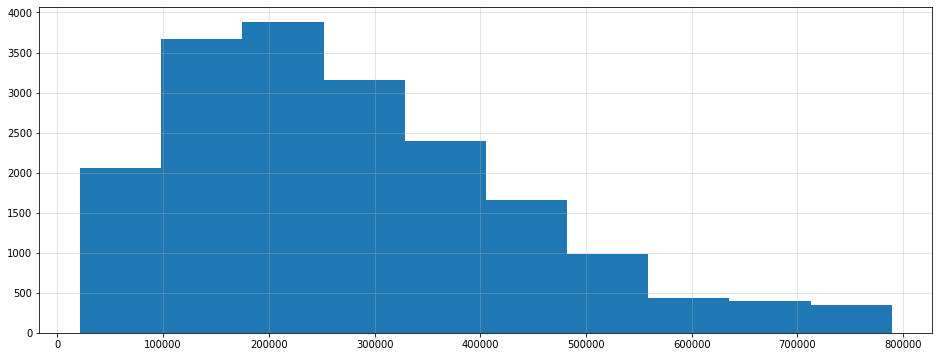

In [30]:
plt.figure(figsize=(16,6))
plt.hist(loan_sanction['Current Loan Amount'])
plt.grid(alpha=0.4)

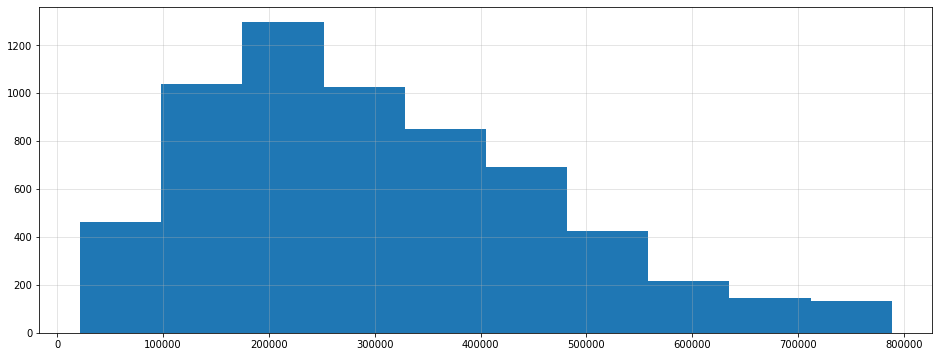

In [29]:
plt.figure(figsize=(16,6))
plt.hist(loan_rejected['Current Loan Amount'])
plt.grid(alpha=0.4)

### Annual Income 

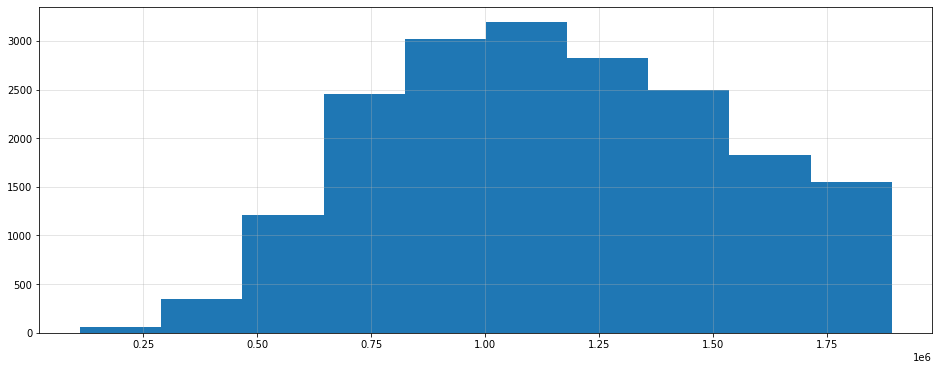

In [31]:
plt.figure(figsize=(16,6))
plt.hist(loan_sanction['Annual Income'])
plt.grid(alpha=0.4)

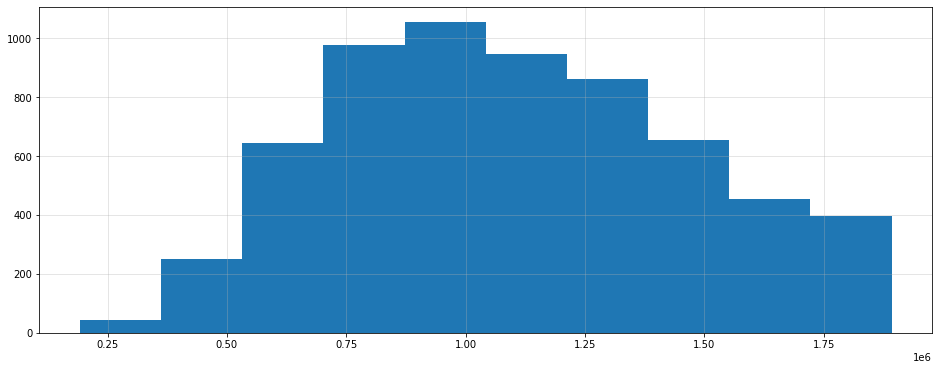

In [32]:
plt.figure(figsize=(16,6))
plt.hist(loan_rejected['Annual Income'])
plt.grid(alpha=0.4)

### Just a refrence of features what we have

In [33]:
loan_sanction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18980 entries, 6277 to 25256
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   18980 non-null  object 
 1   Current Loan Amount           18980 non-null  int64  
 2   Term                          18980 non-null  object 
 3   Credit Score                  18980 non-null  float64
 4   Annual Income                 18980 non-null  int64  
 5   Years in current job          18980 non-null  object 
 6   Home Ownership                18980 non-null  object 
 7   Purpose                       18980 non-null  object 
 8   Monthly Debt                  18980 non-null  float64
 9   Years of Credit History       18980 non-null  float64
 10  Months since last delinquent  18980 non-null  int64  
 11  Number of Open Accounts       18980 non-null  int64  
 12  Number of Credit Problems     18980 non-null  int64  
 13

### Months since last Delinquent

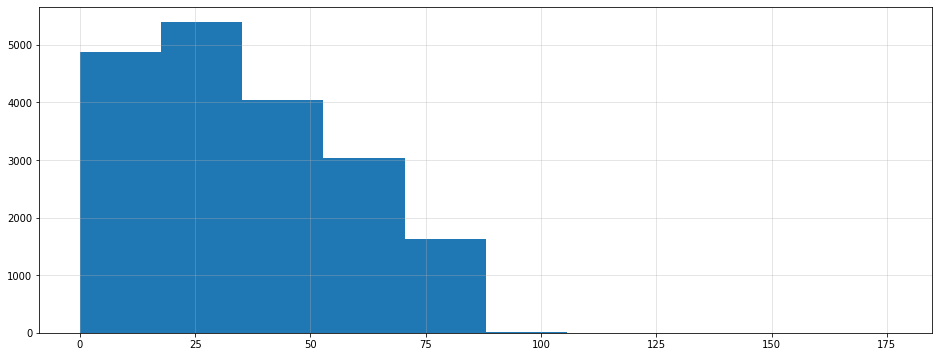

In [34]:
plt.figure(figsize=(16,6))
plt.hist(loan_sanction['Months since last delinquent'])
plt.grid(alpha=0.4)

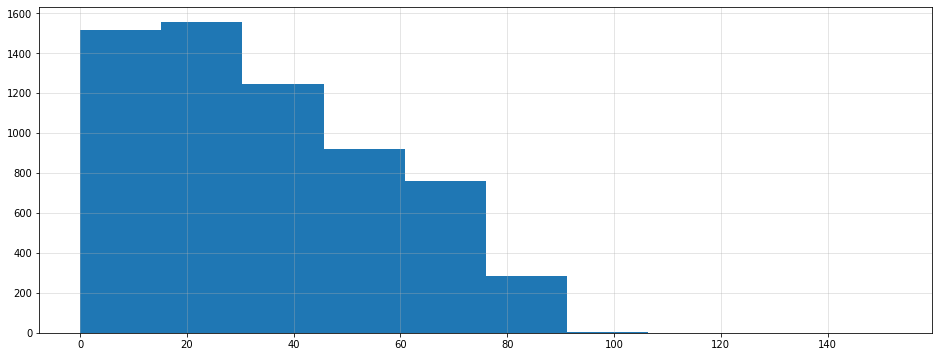

In [35]:
plt.figure(figsize=(16,6))
plt.hist(loan_rejected['Months since last delinquent'])
plt.grid(alpha=0.4)

### Purpose 

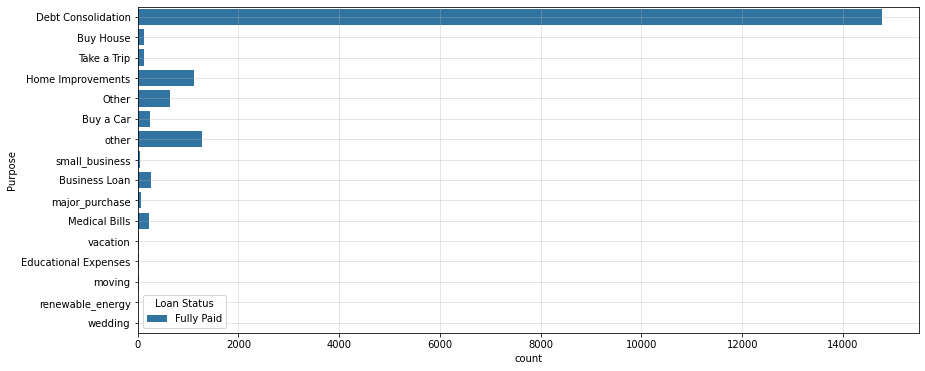

In [36]:
plt.figure(figsize=(14,6))
sns.countplot(y ='Purpose', data = loan_sanction,hue='Loan Status') 
plt.grid(alpha=0.4)

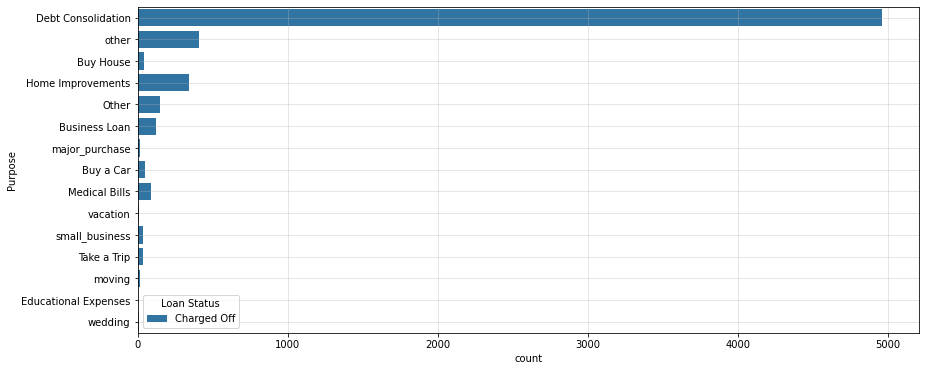

In [37]:
plt.figure(figsize=(14,6))
sns.countplot(y ='Purpose', data = loan_rejected,hue='Loan Status') 
plt.grid(alpha=0.4)

### CREDIT Score

In [40]:
loan_sanction['Credit Score'].describe()

count    18980.000000
mean       713.658641
std         26.301808
min        587.000000
25%        701.000000
50%        718.000000
75%        734.000000
max        751.000000
Name: Credit Score, dtype: float64

In [41]:
loan_rejected['Credit Score'].describe()

count    6277.000000
mean     1416.761542
std      1680.548120
min       351.000000
25%       420.600000
50%       436.800000
75%      3834.000000
max      4506.000000
Name: Credit Score, dtype: float64

In [42]:
low = .05
high = .73
a = loan_rejected['Credit Score'].quantile([low, high])
print(a)

0.05    390.6
0.73    448.2
Name: Credit Score, dtype: float64


In [43]:
loan_sanction = loan_sanction[loan_sanction['Credit Score'] <=  900]
loan_rejected = loan_rejected[loan_rejected['Credit Score'] <=  900]

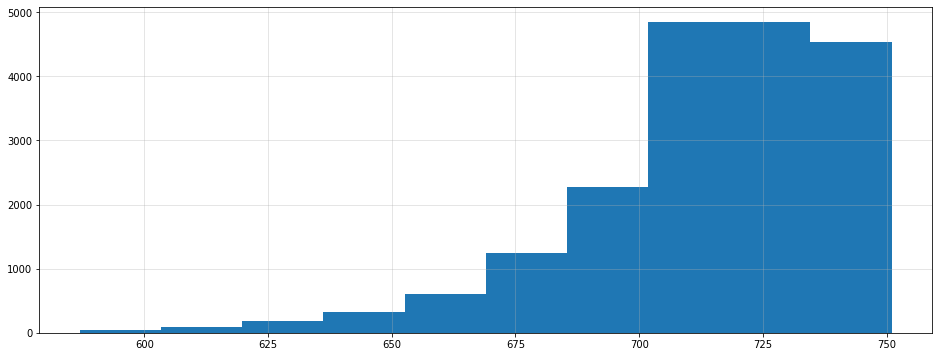

In [44]:
plt.figure(figsize=(16,6))
plt.hist(loan_sanction['Credit Score'])
plt.grid(alpha=0.4)

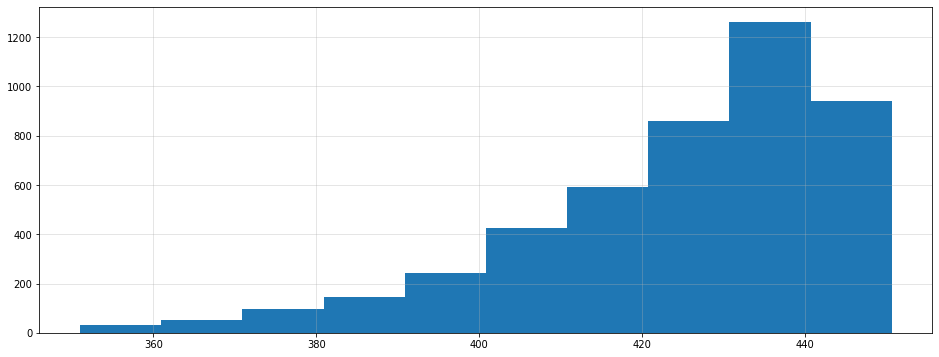

In [45]:
plt.figure(figsize=(16,6))
plt.hist(loan_rejected['Credit Score'])
plt.grid(alpha=0.4)

### Number of Open Accounts

In [46]:
low = .05
high = .70
temp = loan_rejected['Number of Open Accounts'].quantile([low, high])
print(temp)

0.05     5.0
0.70    13.0
Name: Number of Open Accounts, dtype: float64


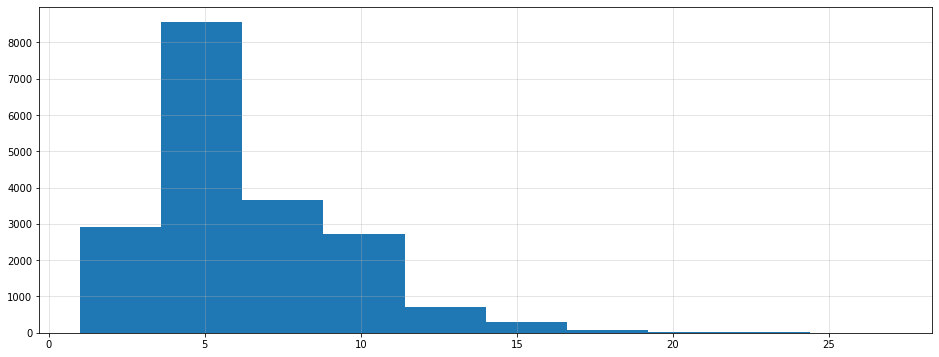

In [47]:
plt.figure(figsize=(16,6))
plt.hist(loan_sanction['Number of Open Accounts'])
plt.grid(alpha=0.4)

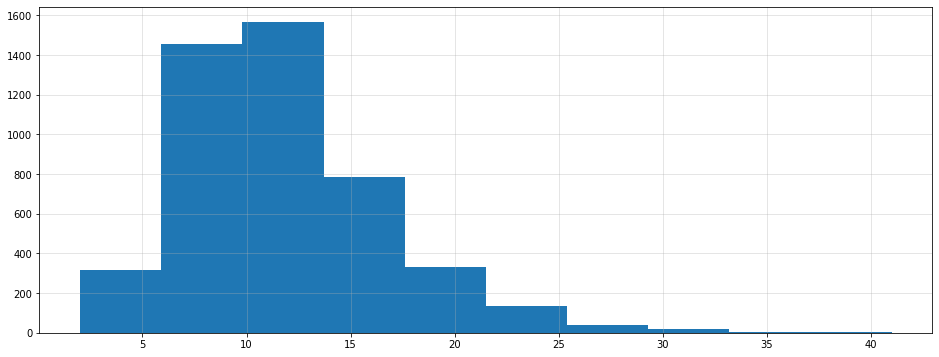

In [48]:
plt.figure(figsize=(16,6))
plt.hist(loan_rejected['Number of Open Accounts'])
plt.grid(alpha=0.4)

### Current Credit Balance

In [49]:
low = .05
high = .8
temp = loan_rejected['Current Credit Balance'].quantile([low, high])
print(temp)

0.05     16727.79
0.80    196319.40
Name: Current Credit Balance, dtype: float64


In [50]:
loan_sanction = loan_sanction[loan_sanction['Current Credit Balance'] <=  289043.2]
loan_rejected = loan_rejected[loan_rejected['Current Credit Balance'] <=  289043.2]

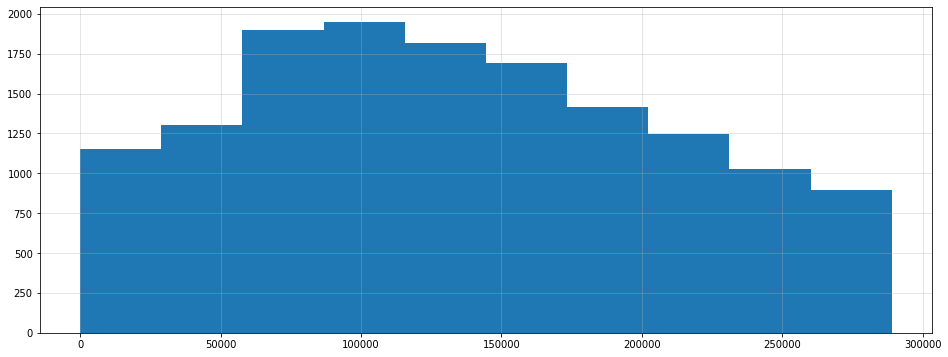

In [51]:
plt.figure(figsize=(16,6))
plt.hist(loan_sanction['Current Credit Balance'])
plt.grid(alpha=0.4)

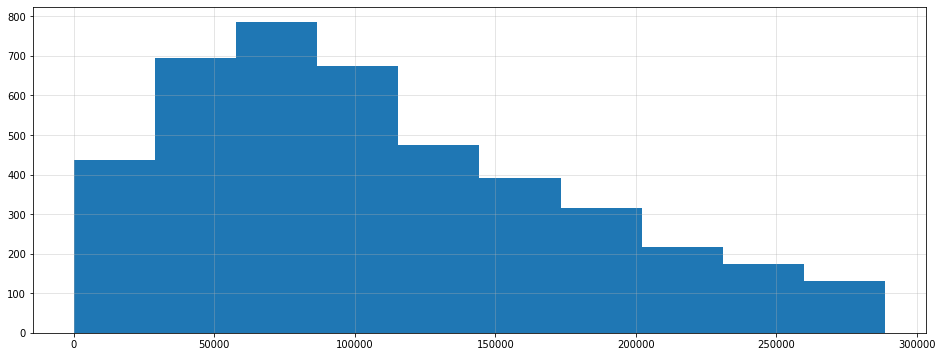

In [52]:
plt.figure(figsize=(16,6))
plt.hist(loan_rejected['Current Credit Balance'])
plt.grid(alpha=0.4)

### Number of Credit Problems

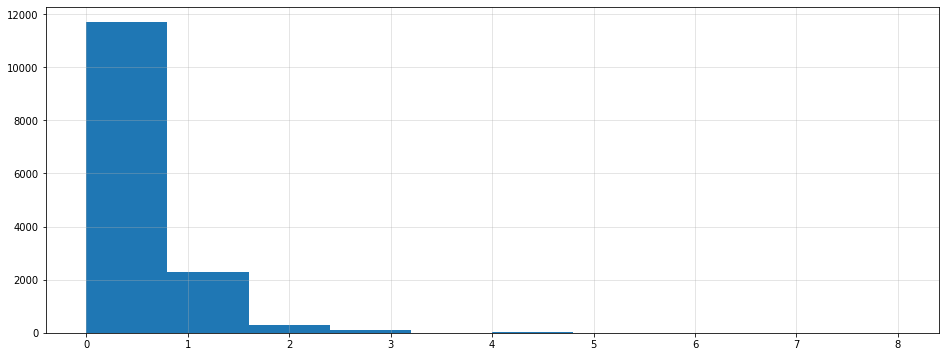

In [53]:
plt.figure(figsize=(16,6))
plt.hist(loan_sanction['Number of Credit Problems'])
plt.grid(alpha=0.4)

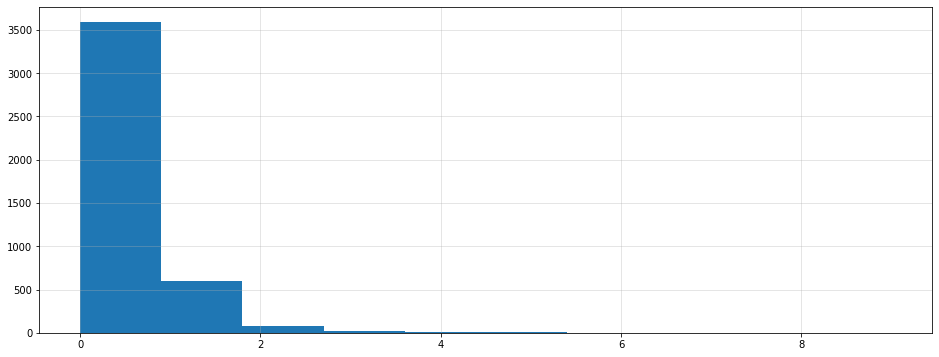

In [54]:
plt.figure(figsize=(16,6))
plt.hist(loan_rejected['Number of Credit Problems'])
plt.grid(alpha=0.4)

### Just a refrence of features what we have

In [55]:
loan_sanction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14398 entries, 6277 to 25256
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   14398 non-null  object 
 1   Current Loan Amount           14398 non-null  int64  
 2   Term                          14398 non-null  object 
 3   Credit Score                  14398 non-null  float64
 4   Annual Income                 14398 non-null  int64  
 5   Years in current job          14398 non-null  object 
 6   Home Ownership                14398 non-null  object 
 7   Purpose                       14398 non-null  object 
 8   Monthly Debt                  14398 non-null  float64
 9   Years of Credit History       14398 non-null  float64
 10  Months since last delinquent  14398 non-null  int64  
 11  Number of Open Accounts       14398 non-null  int64  
 12  Number of Credit Problems     14398 non-null  int64  
 13

### Home Ownership 

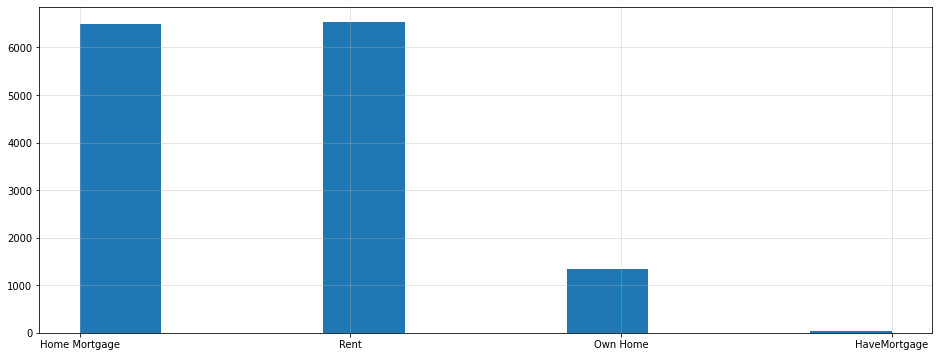

In [56]:
plt.figure(figsize=(16,6))
plt.hist(loan_sanction['Home Ownership'])
plt.grid(alpha=0.4)

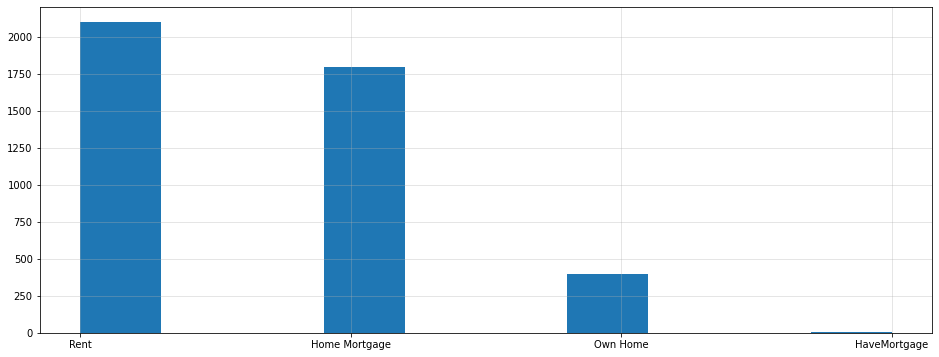

In [57]:
plt.figure(figsize=(16,6))
plt.hist(loan_rejected['Home Ownership'])
plt.grid(alpha=0.4)

### Years in current Job

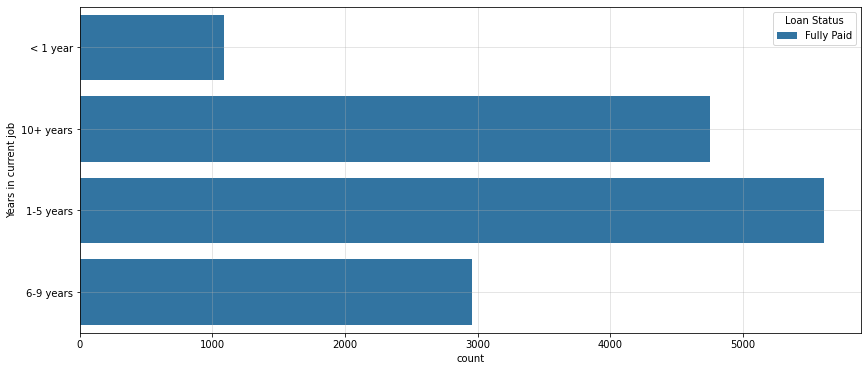

In [58]:
plt.figure(figsize=(14,6))
sns.countplot(y ='Years in current job', data = loan_sanction,hue='Loan Status') 
plt.grid(alpha=0.4)

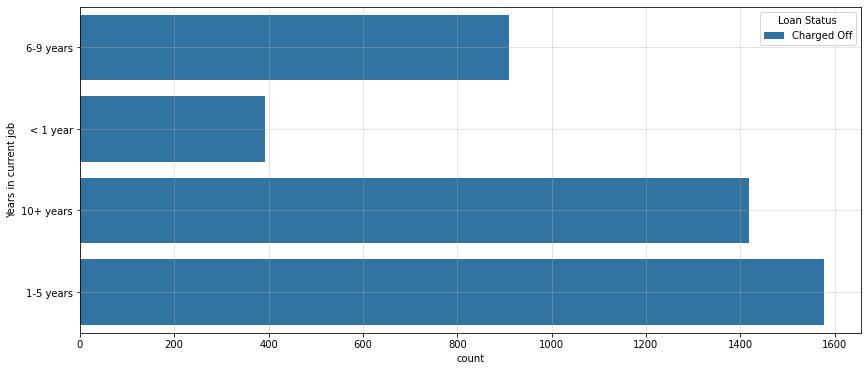

In [59]:
plt.figure(figsize=(14,6))
sns.countplot(y ='Years in current job', data = loan_rejected,hue='Loan Status') 
plt.grid(alpha=0.4)

## Now let's validate our inferences with Machine Learning Algorithms

In [60]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,317108,Long Term,412.2,1133274,6-9 years,Rent,Debt Consolidation,9632.81,17.4,53,4,0,36172.2,126940,0,0
1,Charged Off,688468,Long Term,409.2,1494616,< 1 year,Rent,Debt Consolidation,14697.07,16.6,50,8,0,206397.0,843854,0,0
2,Charged Off,219692,Long Term,3966.0,527839,10+ years,Rent,Debt Consolidation,14207.63,17.0,48,9,0,152566.2,379918,0,0
3,Charged Off,374176,Long Term,391.2,1239199,10+ years,Home Mortgage,other,5163.25,36.6,42,10,0,75810.0,415602,0,0
4,Charged Off,290224,Long Term,386.4,837045,6-9 years,Home Mortgage,Debt Consolidation,8230.99,18.3,10,11,0,105974.4,370480,0,0


### Encoding data 

In [61]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

In [62]:
df["Term"]= df["Term"].astype(str) 
df["Years in current job"]= df["Years in current job"].astype(str) 
df["Home Ownership"]= df["Home Ownership"].astype(str) 
df["Purpose"]= df["Purpose"].astype(str) 
df["Loan Status"]= df["Loan Status"].astype(str) 

In [63]:
df['Term'] = label_encoder.fit_transform(df['Term']) 
df['Years in current job'] = label_encoder.fit_transform(df['Years in current job']) 
df['Home Ownership'] = label_encoder.fit_transform(df['Home Ownership']) 
df['Purpose'] = label_encoder.fit_transform(df['Purpose']) 
df['Loan Status'] = label_encoder.fit_transform(df['Loan Status']) 

In [64]:
df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [65]:
for i in df.columns:
    df[i] = df[i].astype(float)

In [66]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0.0,317108.0,0.0,412.2,1133274.0,2.0,3.0,3.0,9632.81,17.4,53.0,4.0,0.0,36172.2,126940.0,0.0,0.0
1,0.0,688468.0,0.0,409.2,1494616.0,3.0,3.0,3.0,14697.07,16.6,50.0,8.0,0.0,206397.0,843854.0,0.0,0.0
2,0.0,219692.0,0.0,3966.0,527839.0,1.0,3.0,3.0,14207.63,17.0,48.0,9.0,0.0,152566.2,379918.0,0.0,0.0
3,0.0,374176.0,0.0,391.2,1239199.0,1.0,1.0,11.0,5163.25,36.6,42.0,10.0,0.0,75810.0,415602.0,0.0,0.0
4,0.0,290224.0,0.0,386.4,837045.0,2.0,1.0,3.0,8230.99,18.3,10.0,11.0,0.0,105974.4,370480.0,0.0,0.0


### Standardizing Data

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [68]:
label = df['Loan Status']

In [69]:
column = df.columns

In [70]:
df = scaler.fit_transform(df.to_numpy())

In [71]:
df = pd.DataFrame(df, columns=column)

### Splitting the model into training and testing

In [72]:
x = df.drop('Loan Status', axis=1)
y = label

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.40,random_state =42)

### Logistic Regression

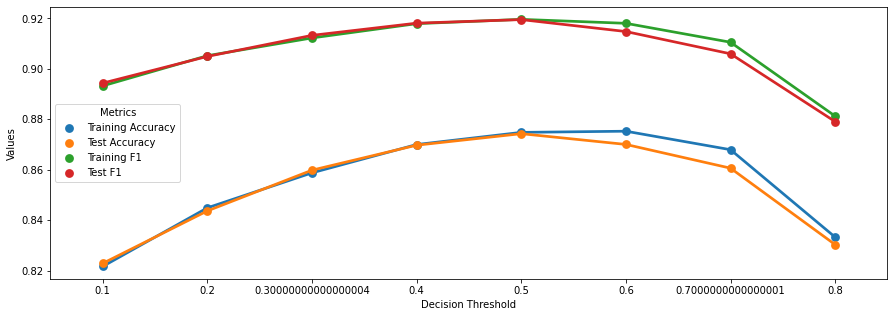

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []


for thresh in np.arange(0.1,0.9,0.1): 
    logreg_clf = LogisticRegression()
    logreg_clf.fit(x_train,y_train)
    y_pred_train_thresh = logreg_clf.predict_proba(x_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(x_test)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

### Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train,y_train)
y_pred = tree_clf.predict(x_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,x_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,x_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  1.0
Validation Mean Accuracy:  1.0


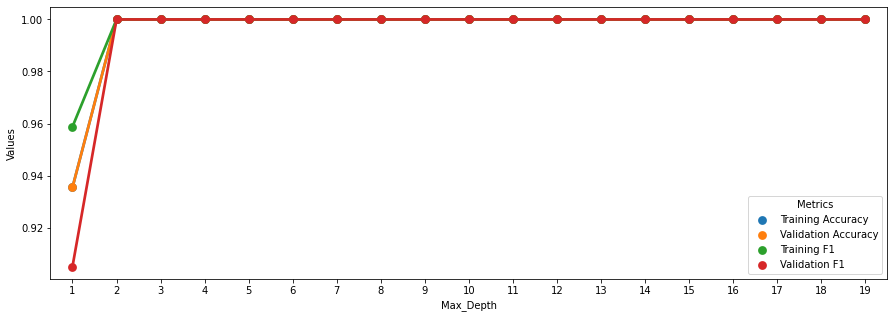

In [85]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(x_train,y_train)
    y_training_pred = tree_clf.predict(x_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,x_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,x_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

### Tree Representation

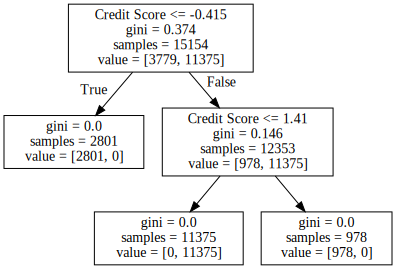

In [87]:
import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 4)
tree_clf.fit(x_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = x_train.columns.tolist())
graph = graphviz.Source(dot_data)
graph

### Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,x_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,x_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.9774856062559079
Train Accuracy  0.9654216708459813
Validation Mean F1 Score:  0.9188852442170695
Validation Mean Accuracy:  0.9470104628410713


In [89]:
y_pred_log = rf_clf.predict(x_test)

### ROC Curve

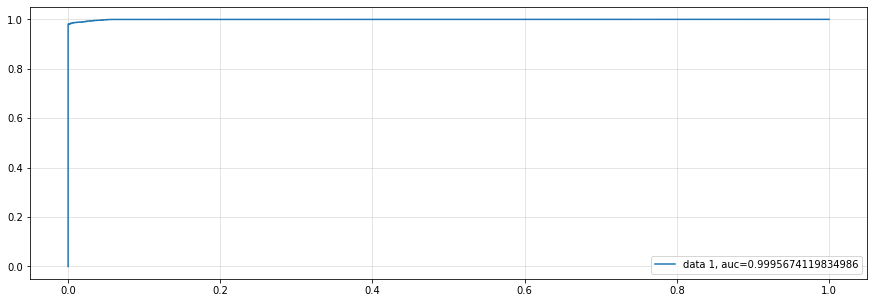

In [95]:
from sklearn import metrics
plt.figure(figsize=(15,5))
y_pred_proba = rf_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.grid(alpha=0.4)
plt.show()

### AUC Curve

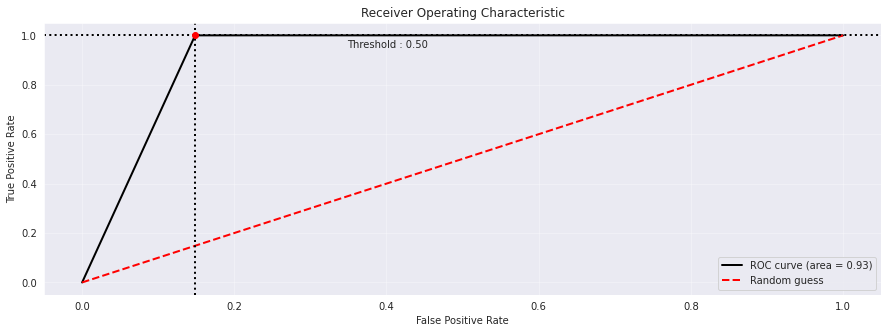

In [97]:
from plot_metric.functions import BinaryClassification
plt.figure(figsize=(15,5))
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred_log, labels=["Class 1", "Class 2"])

# Figures
bc.plot_roc_curve()
plt.grid(alpha=0.4)
plt.show()